#                            SHOPPING MALL DATA SET

Examining consumer purchase data and drawing insightful conclusions to advance business development

Shopping data includes a shopping mall's 3 years customer information.  
The data collection includes 99458 customer transaction histories with the following insights: invoice id, customer id, gender, age, category, quantity, price, payment method, invoice date, and shopping mall.

Objective: Using Python, Seaborn, Matplotlib libraries to extract, analyze and visualize the data

In [1]:
import warnings
warnings.filterwarnings('ignore') 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import plotly.express as px


# Contents

In [ ]:
a) Data Loading
b) Data Cleaning and processing
c) Exploratory Data Analysis
d) Exploration based on Category
e) Exploration based on Gender
f) Exploration based on Age_Group
g) Exploration based on Payment Method
h) Exploration based on Shopping Mall
i) Exploration based on Date
j) Report of Final Analysis

# Importing Shopping Data File which is of CSV data type file

In [3]:
shopping=pd.read_csv("shopping.csv")
shopping

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon
...,...,...,...,...,...,...,...,...,...,...
99452,I219422,C441542,Female,45,Souvenir,5,58.65,Credit Card,21/09/2022,Kanyon
99453,I325143,C569580,Male,27,Food & Beverage,2,10.46,Cash,22/09/2021,Forum Istanbul
99454,I824010,C103292,Male,63,Food & Beverage,2,10.46,Debit Card,28/03/2021,Metrocity
99455,I702964,C800631,Male,56,Technology,4,4200.00,Cash,16/03/2021,Istinye Park


Checking the dimension of data set

In [4]:
shopping.shape

(99457, 10)

# Data Cleaning and Processing

a) Checking for null values

In [5]:
shopping.isna().any()

invoice_no        False
customer_id       False
gender            False
age               False
category          False
quantity          False
price             False
payment_method    False
invoice_date      False
shopping_mall     False
dtype: bool

In [6]:
shopping.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99457 non-null  object 
 1   customer_id     99457 non-null  object 
 2   gender          99457 non-null  object 
 3   age             99457 non-null  int64  
 4   category        99457 non-null  object 
 5   quantity        99457 non-null  int64  
 6   price           99457 non-null  float64
 7   payment_method  99457 non-null  object 
 8   invoice_date    99457 non-null  object 
 9   shopping_mall   99457 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 7.6+ MB


No Null values found in a dataset

b) invoice date is in object form so convert it to date time format

In [7]:
shopping["invoice_date"] = pd.to_datetime(shopping["invoice_date"],format="%d/%m/%Y")

In [8]:
shopping["invoice_date"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 99457 entries, 0 to 99456
Series name: invoice_date
Non-Null Count  Dtype         
--------------  -----         
99457 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 777.1 KB


c) Adding new column Revenue, age group, Year and month

In [9]:
shopping['Sales'] = shopping['quantity'] * shopping['price']

In [10]:
def age_group_(x):
    if x <= 20 :
        x= '<20'
    elif x >20 and x <=30:
        x= '21-30'
    elif x >30 and x <=40:
        x= '31-40'
    elif x >40 and x <=50:
        x= '41-50'
    elif x >50 and x <=60:
        x= '51-60'
    else:
        x= '>61'
    return x

In [11]:
shopping['age_group']=shopping['age'].apply(age_group_)

In [12]:
shopping['year'] = shopping['invoice_date'].dt.year
shopping['month'] = shopping['invoice_date'].dt.month

In [13]:
shopping

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,Sales,age_group,year,month
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-08-05,Kanyon,7502.00,21-30,2022,8
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,Forum Istanbul,5401.53,21-30,2021,12
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,2021-11-09,Metrocity,300.08,<20,2021,11
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,2021-05-16,Metropol AVM,15004.25,>61,2021,5
4,I337046,C189076,Female,53,Books,4,60.60,Cash,2021-10-24,Kanyon,242.40,51-60,2021,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99452,I219422,C441542,Female,45,Souvenir,5,58.65,Credit Card,2022-09-21,Kanyon,293.25,41-50,2022,9
99453,I325143,C569580,Male,27,Food & Beverage,2,10.46,Cash,2021-09-22,Forum Istanbul,20.92,21-30,2021,9
99454,I824010,C103292,Male,63,Food & Beverage,2,10.46,Debit Card,2021-03-28,Metrocity,20.92,>61,2021,3
99455,I702964,C800631,Male,56,Technology,4,4200.00,Cash,2021-03-16,Istinye Park,16800.00,51-60,2021,3


# EXPLORATORY DATA ANALYSIS 

In [14]:
shopping[['age', 'quantity','price', 'Sales']].describe()

,age,quantity,price,Sales
count,99457.000000,99457.000000,99457.000000,99457.000000
mean,43.427089,3.003429,689.256321,2528.789268
std,14.990054,1.413025,941.184567,4222.475781
min,18.000000,1.000000,5.230000,5.230000
25%,30.000000,2.000000,45.450000,136.350000
50%,43.000000,3.000000,203.300000,600.170000
75%,56.000000,4.000000,1200.320000,2700.720000
max,69.000000,5.000000,5250.000000,26250.000000


# Exploration based on Category

Categories with High demand

In [15]:
count_Category=shopping.groupby("category")["category"].count().sort_values(ascending=False)
count_Category

category
Clothing           34487
Cosmetics          15097
Food & Beverage    14776
Toys               10087
Shoes              10034
Souvenir            4999
Technology          4996
Books               4981
Name: category, dtype: int64

Text(0, 0.5, 'Count')

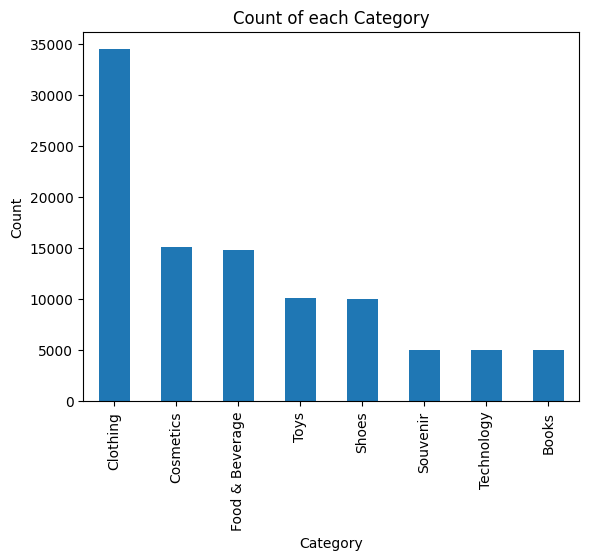

In [16]:

count_Category.plot.bar()
plt.title("Count of each Category")
plt.xlabel("Category")
plt.ylabel("Count")

Average cost of a category

In [17]:
shopping_avg=shopping.groupby('category')['price'].mean().sort_values(ascending=False)
shopping_avg

category
Technology         3156.935548
Shoes              1807.388568
Clothing            901.084021
Cosmetics           122.448626
Toys                107.733185
Books                45.568621
Souvenir             34.894345
Food & Beverage      15.671948
Name: price, dtype: float64

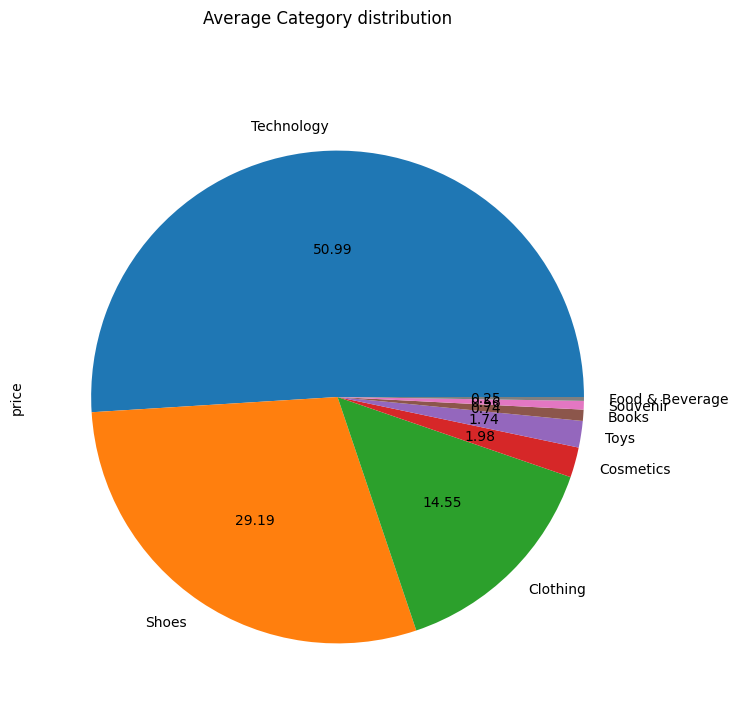

In [18]:
shopping_avg.plot(kind='pie', subplots=True, autopct='%1.2f', figsize=(8,8), title='Average Category distribution')
plt.show()

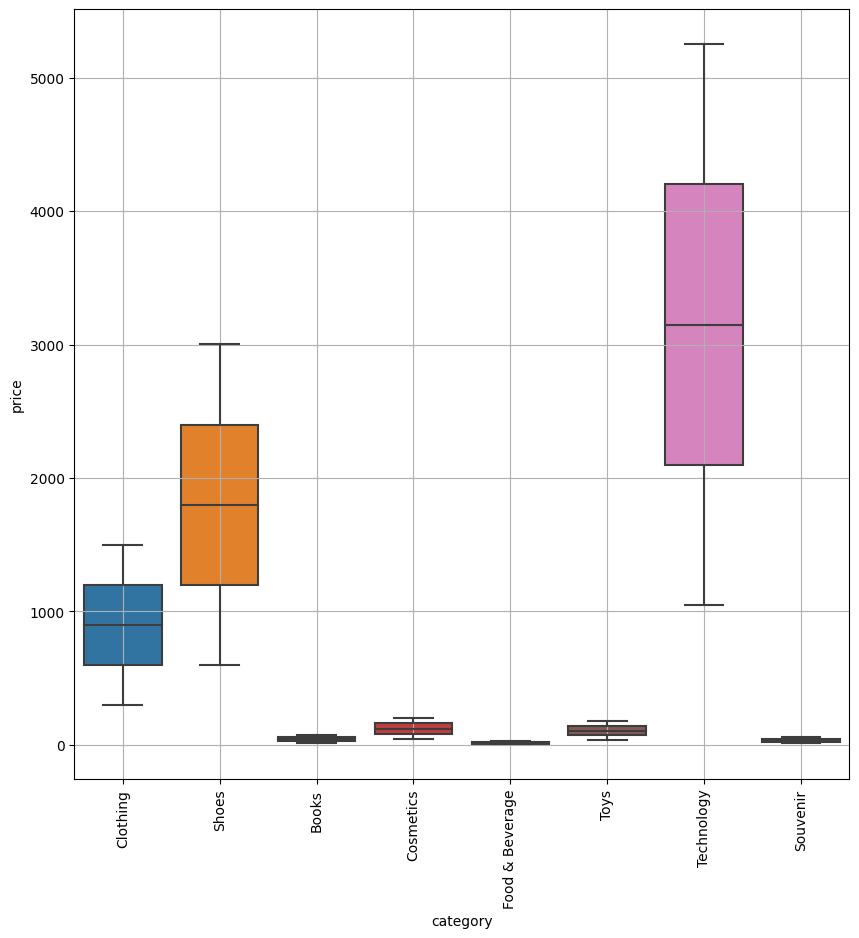

In [19]:
fig, ax = plt.subplots(figsize=(10, 10))
plt.xticks(rotation=90)
sns.boxplot(x='category', y='price', data=shopping, ax=ax)
ax.grid(True)
plt.show()

Category sales in different years

In [20]:
s6=shopping.pivot_table(index='category',columns='year',values='price', aggfunc=(['sum']))
s6

sum                         
year                    2021         2022        2023
category                                             
Books              100065.75    106822.65    20088.90
Clothing         14365129.68  14070451.12  2640103.84
Cosmetics          828081.56    855405.08   165120.26
Food & Beverage    106179.46    105876.12    19513.13
Shoes             8242134.61   8378373.20  1514829.08
Souvenir            79118.85     80948.73    14369.25
Technology        7104300.00   7268100.00  1399650.00
Toys               491294.72    506849.28    88560.64

([<matplotlib.axis.XTick at 0x149f7934af0>,
 [Text(0, 0, 'Books'),
  Text(1, 0, 'Clothing'),
  Text(2, 0, 'Cosmetics'),
  Text(3, 0, 'Food & Beverage'),
  Text(4, 0, 'Shoes'),
  Text(5, 0, 'Souvenir'),
  Text(6, 0, 'Technology'),
  Text(7, 0, 'Toys')])

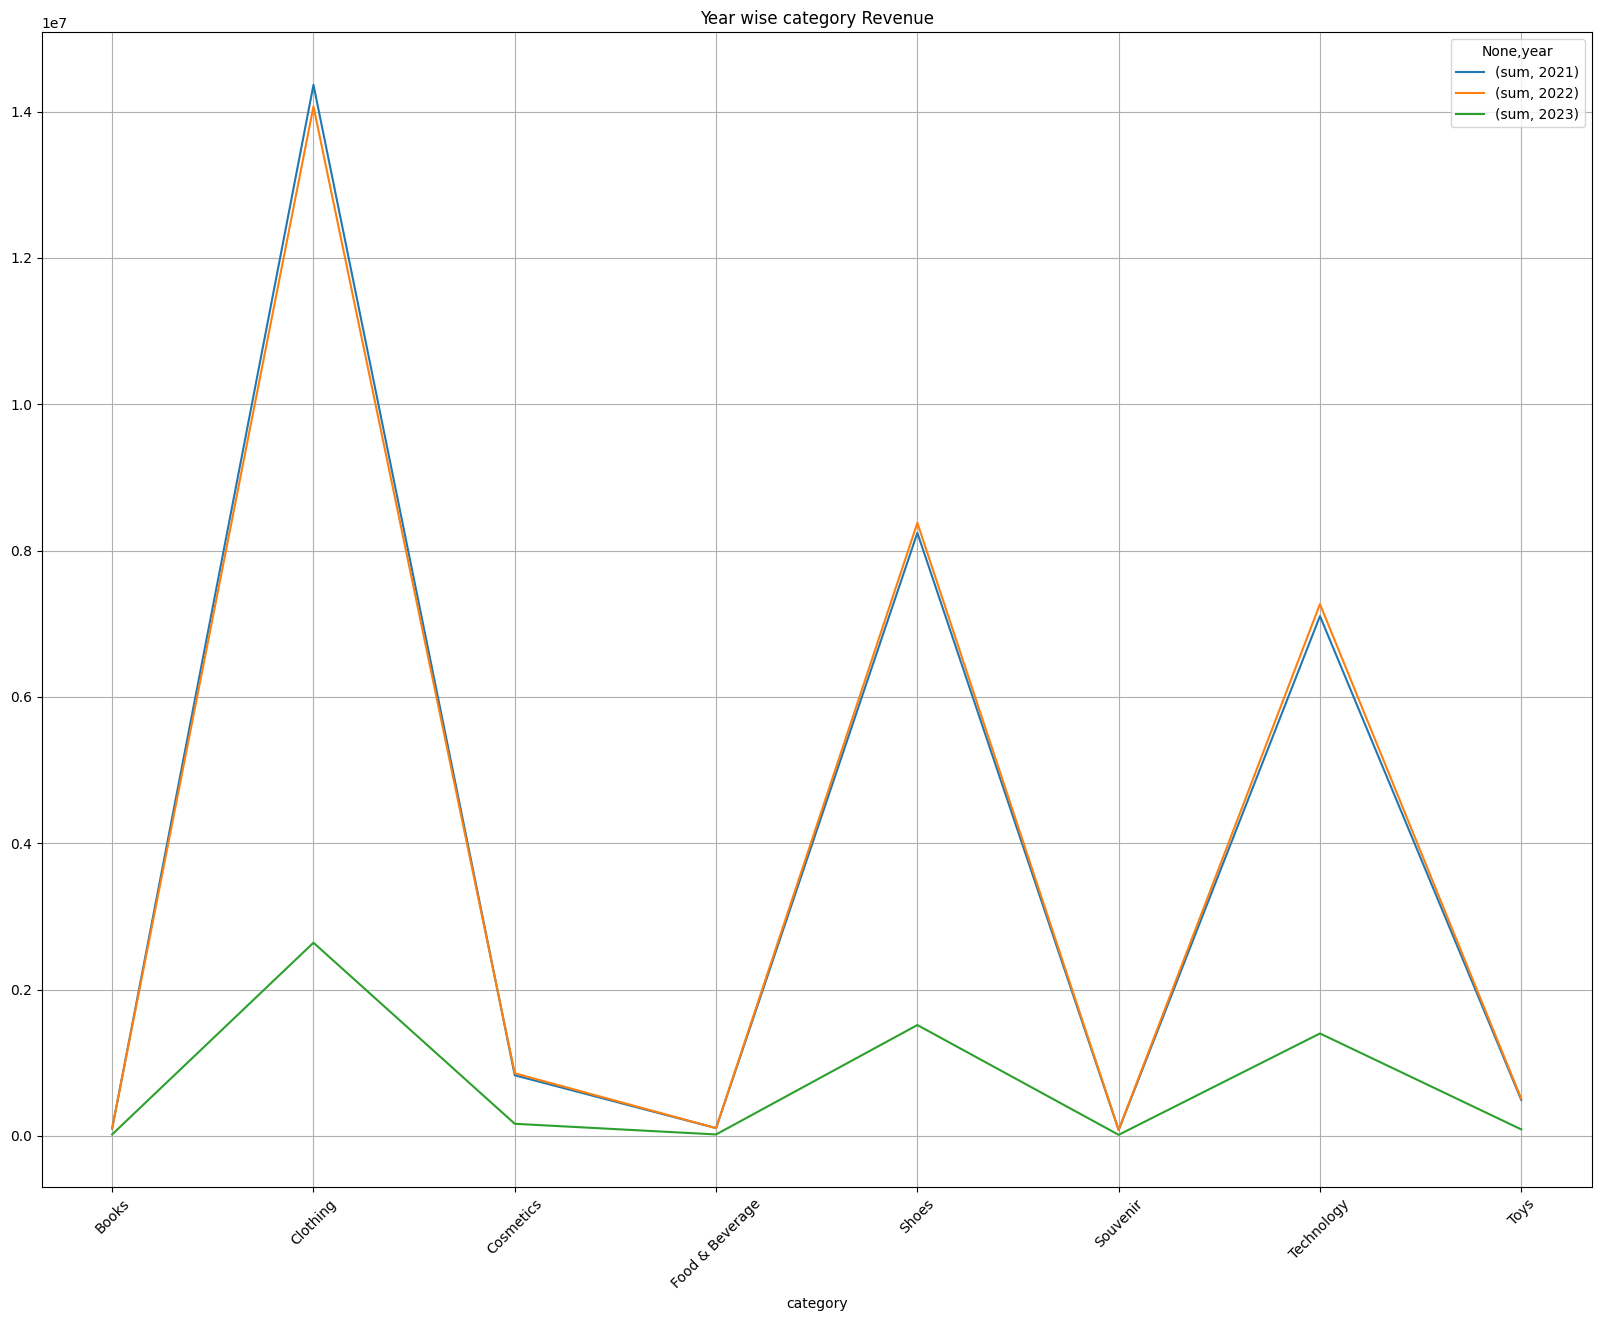

In [24]:
s6.plot(kind='line', figsize=(20, 15), title="Year wise category Revenue", grid=True)
plt.xticks(range(len(s6.index)), s6.index, rotation=45)

# Inferences of category analysis

In [ ]:
a) Shopping malls has high demands of clothing followed by shoes and low demands for books
b) Clothing sector earns the heighest revenue in all of the  malls
c) On an average price of Technology items are high and lowest average price is of foods and beverages



# Exploration based on Gender

Males and Females visiting Mall

In [25]:
Gender_visit=shopping.groupby("gender")["gender"].count().sort_values(ascending=False)
Gender_visit

gender
Female    59482
Male      39975
Name: gender, dtype: int64

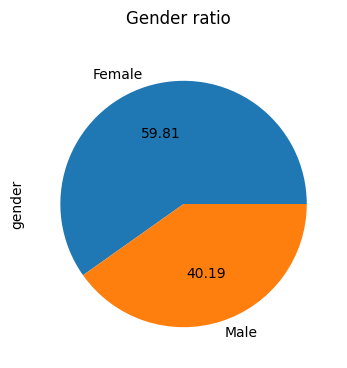

In [26]:
Gender_visit.plot(kind='pie',autopct='%1.2f', subplots=True, figsize=(4,4), title='Gender ratio')
plt.show()

Average Revenue generated by Males and Females

In [27]:
Genderwise_revenue=shopping.groupby("gender")["Sales"].mean().sort_values(ascending=False)
Genderwise_revenue

gender
Male      2534.050237
Female    2525.253623
Name: Sales, dtype: float64

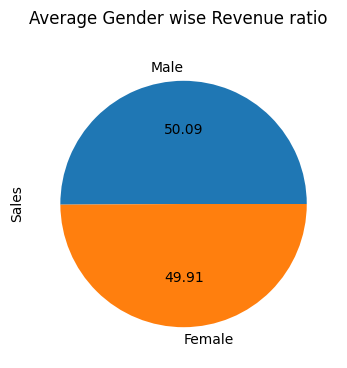

In [28]:
Genderwise_revenue.plot(kind='pie',autopct='%1.2f', subplots=True, figsize=(4,4), title='Average Gender wise Revenue ratio')
plt.show()

Category Distribution accross genders

In [29]:
gender_cat=shopping.pivot_table(index='gender',columns='category',values='age_group', aggfunc=(['count']))
gender_cat

count                                                                
category Books Clothing Cosmetics Food & Beverage Shoes Souvenir Technology   
gender                                                                        
Female    2906    20652      9070            8804  5967     3017       2981  \
Male      2075    13835      6027            5972  4067     1982       2015   

                
category  Toys  
gender          
Female    6085  
Male      4002

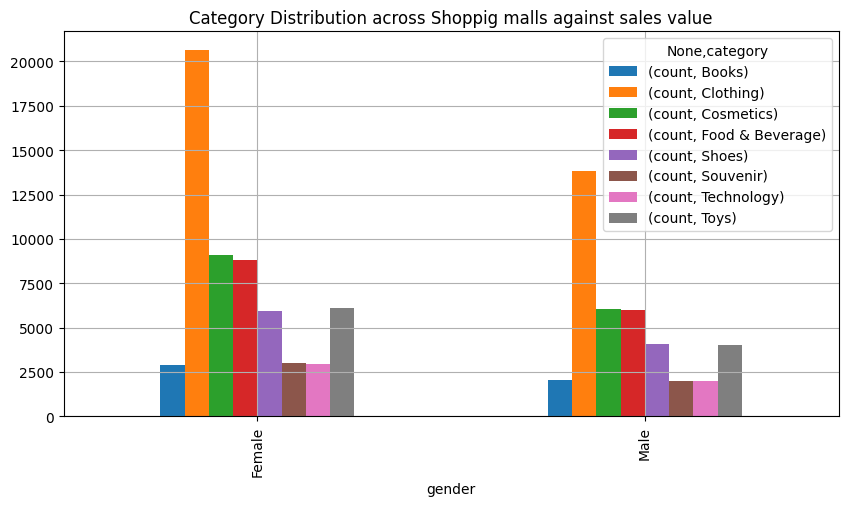

In [30]:
gender_cat.plot(kind='bar', figsize=(10,5), title= 'Category Distribution across Shoppig malls against sales value',grid=True)
plt.show()

Year wise revenue generated from Males and Females

In [31]:
gender_year_wise_purchase=shopping.pivot_table(index='gender',columns='year',values='Sales', aggfunc=(['sum']))
gender_year_wise_purchase

sum                          
year           2021         2022         2023
gender                                       
Female  68394414.66  69059876.23  12752845.13
Male    46166155.93  46376937.85   8755564.45

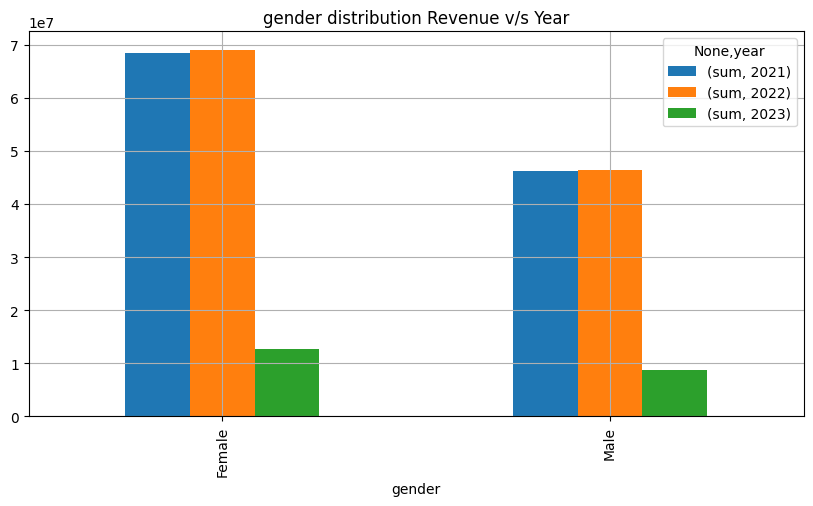

In [32]:
gender_year_wise_purchase.plot(kind='bar', figsize=(10,5), title= 'gender distribution Revenue v/s Year',grid=True)
plt.show()

# Inferences about Gender exploration

In [ ]:
a) Females make heighest visit to shaopping malls.
b) On an average Males generate higher revenue than Females.
c) Both Males and Females spend much amount on Clothing followed by cosmetics.


# Exploration Based on Age Group

Different Age group people visiting Mall

In [34]:
Age_destribution=shopping.groupby('age_group')['age_group'].count().sort_values(ascending=False)
Age_destribution

age_group
21-30    19400
31-40    19266
41-50    19066
51-60    18932
>61      17169
<20       5624
Name: age_group, dtype: int64

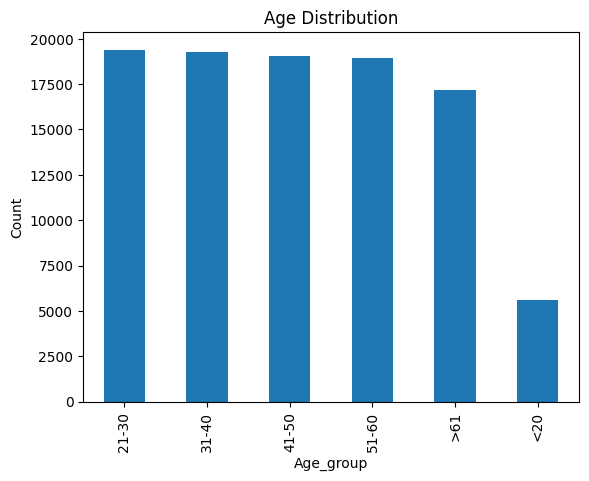

In [35]:
Age_destribution.plot.bar()
plt.title("Age Distribution")
plt.xlabel("Age_group")
plt.ylabel("Count")
plt.grid=True


plt.show()

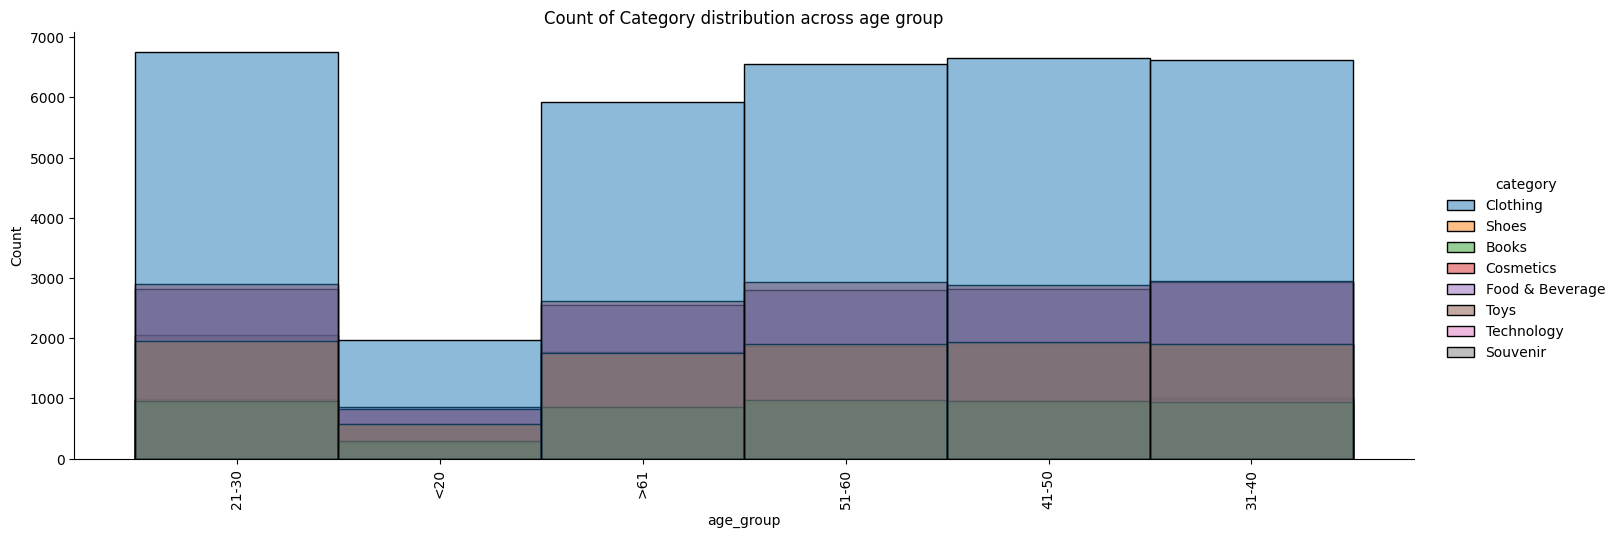

In [36]:
sns.displot(shopping, x='age_group',bins=70, hue='category',aspect=2.9).set(title='Count of Category distribution across age group')
plt.xticks(rotation=90)
plt.show()

Category Distribution across Different age group

In [37]:
Category_dist1=shopping.pivot_table(index='age_group',columns='category',values='Sales', aggfunc=(['sum']))
Category_dist1

sum                                                         
category       Books     Clothing   Cosmetics Food & Beverage        Shoes   
age_group                                                                    
21-30      165771.30  22358660.72  1297460.60       163814.06  13064500.56  \
31-40      162392.85  21506733.60  1355319.78       171010.54  12726604.85   
41-50      154666.35  22181613.52  1273918.46       159462.70  12925861.29   
51-60      156893.40  21902539.12  1319213.70       163013.87  12454127.67   
<20         51676.65   6360795.76   373543.42        47849.27   3921510.78   
>61        143152.35  19686448.32  1173406.94       144384.61  11460846.32   

                                             
category    Souvenir  Technology       Toys  
age_group                                    
21-30      126508.05  11410350.0  801454.08  
31-40      126895.14  11578350.0  743106.56  
41-50      117041.94  11206650.0  760632.32  
51-60      124361.46  10933650.0  734863.36  
<20         35541.90   2639700.0  228264.96  
>61        105476.16  10093650.0  712104.96

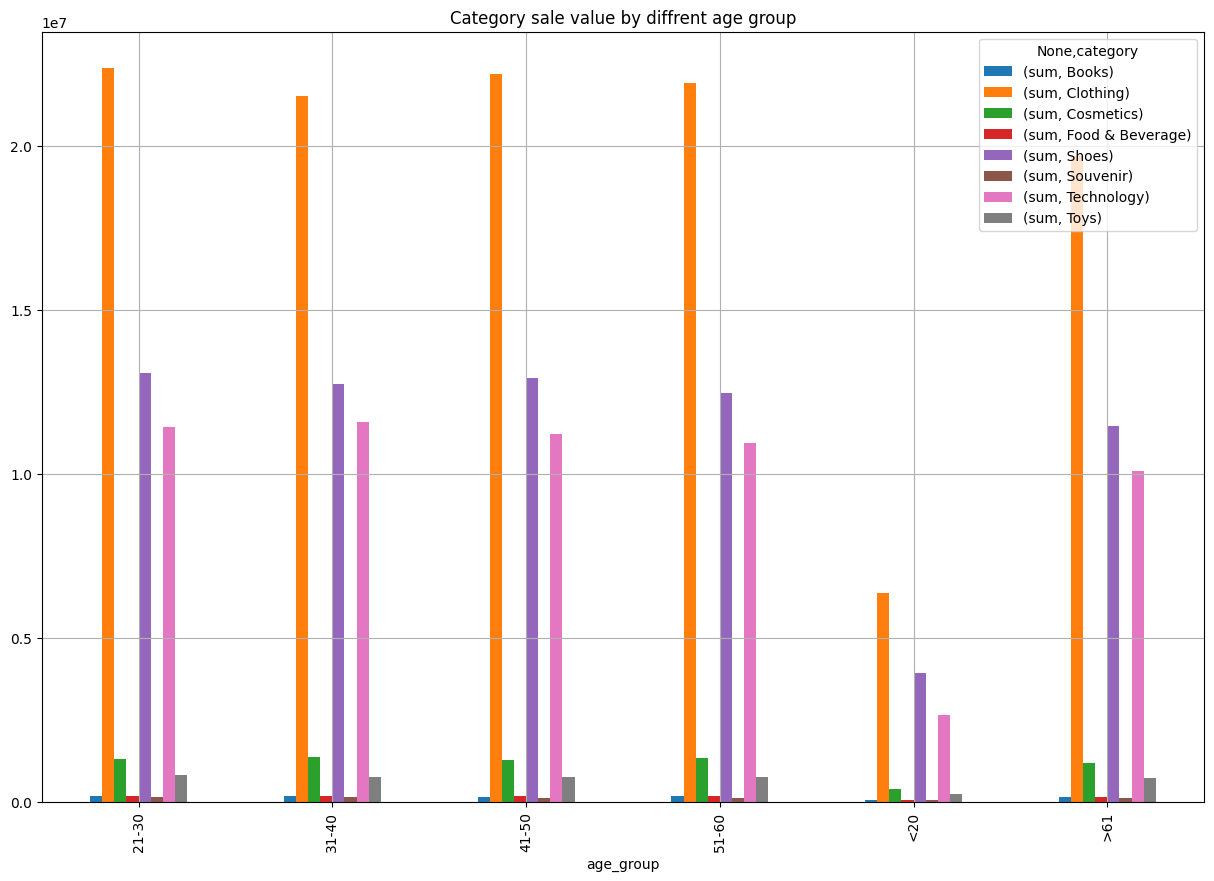

In [38]:
Category_dist1.plot(kind='bar', figsize=(15,10), title= 'Category sale value by diffrent age group',grid=True)
plt.show()

Revenue generated per month by different Age group people

In [39]:
Category_dist=shopping.pivot_table(index='month',columns='age_group',values='Sales', aggfunc=(['count']))
Category_dist

count                             
age_group 21-30 31-40 41-50 51-60  <20   >61
month                                       
1          2324  2234  2224  2140  684  2002
2          2071  2062  1960  2018  586  1785
3          1699  1707  1648  1662  486  1528
4          1455  1502  1420  1427  397  1286
5          1504  1446  1474  1447  446  1380
6          1469  1507  1456  1459  403  1287
7          1568  1526  1535  1462  454  1332
8          1477  1480  1519  1417  440  1302
9          1454  1434  1385  1427  383  1270
10         1469  1478  1474  1506  440  1397
11         1439  1446  1504  1478  444  1252
12         1471  1444  1467  1489  461  1348

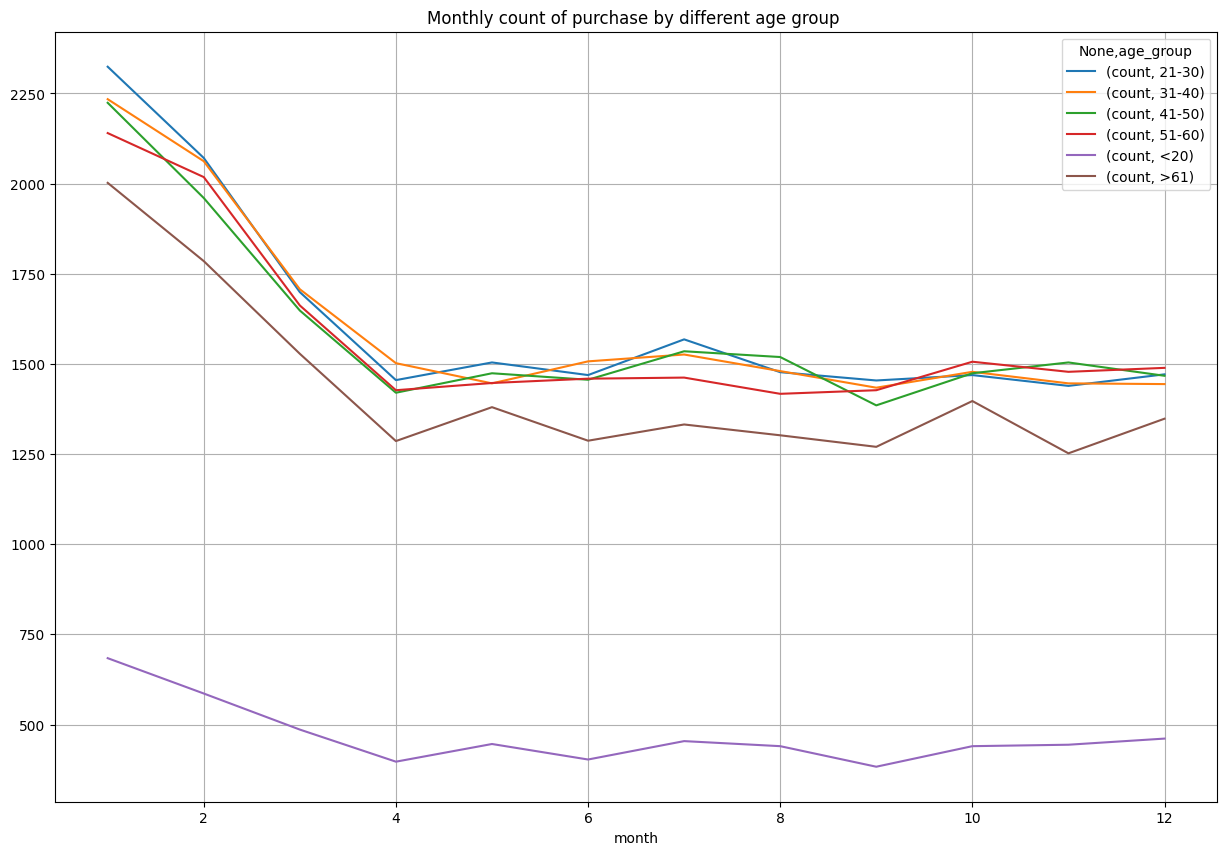

In [40]:
Category_dist.plot(kind='line', figsize=(15,10), title= 'Monthly count of purchase by different age group ',grid=True)
plt.show()

# Inferences based on Age Group Exploration

In [ ]:
a) Age group between 21-30 has a heighest visit
b) Most of the purchases made by this age group is Clothing and least spent on souvenier
c) All the age group peoples are making heighst shopping during january month
d) Age group less than 18 has lowest visit
e) Majority of the age group visiting ranging between 19-59

# Exploration based on payment method

Different modes of payment 

In [41]:
count_Payment=shopping.groupby("payment_method")["payment_method"].count().sort_values(ascending=False)
count_Payment

payment_method
Cash           44447
Credit Card    34931
Debit Card     20079
Name: payment_method, dtype: int64

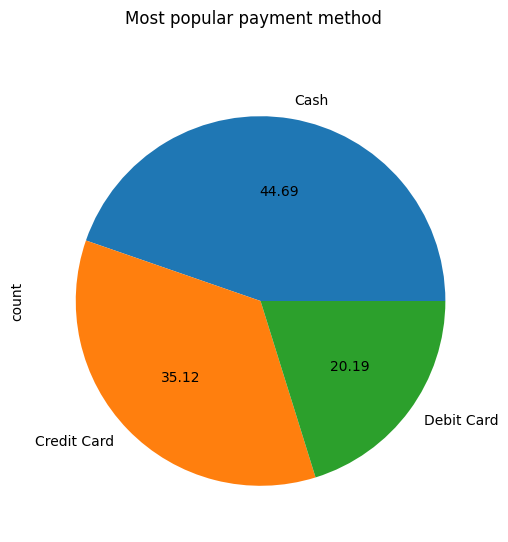

In [42]:
shopping['payment_method'].value_counts().plot(kind='pie', subplots=True, autopct='%1.2f', figsize=(6,6), title='Most popular payment method')
plt.show()

Average revenue generated by different payment method 

In [43]:
Payment=shopping.groupby("payment_method")["price"].mean().sort_values(ascending=False)
Payment

payment_method
Cash           690.823475
Credit Card    688.542467
Debit Card     687.029135
Name: price, dtype: float64

Payment Method of different categories

In [44]:
payment_dist=shopping.pivot_table(index='payment_method',columns='category',values='Sales', aggfunc=(['count']))
payment_dist

count                                                     
category       Books Clothing Cosmetics Food & Beverage Shoes Souvenir   
payment_method                                                           
Cash            2268    15456      6674            6587  4474     2211  \
Credit Card     1696    12025      5336            5250  3553     1770   
Debit Card      1017     7006      3087            2939  2007     1018   

                                 
category       Technology  Toys  
payment_method                   
Cash                 2235  4542  
Credit Card          1753  3548  
Debit Card           1008  1997

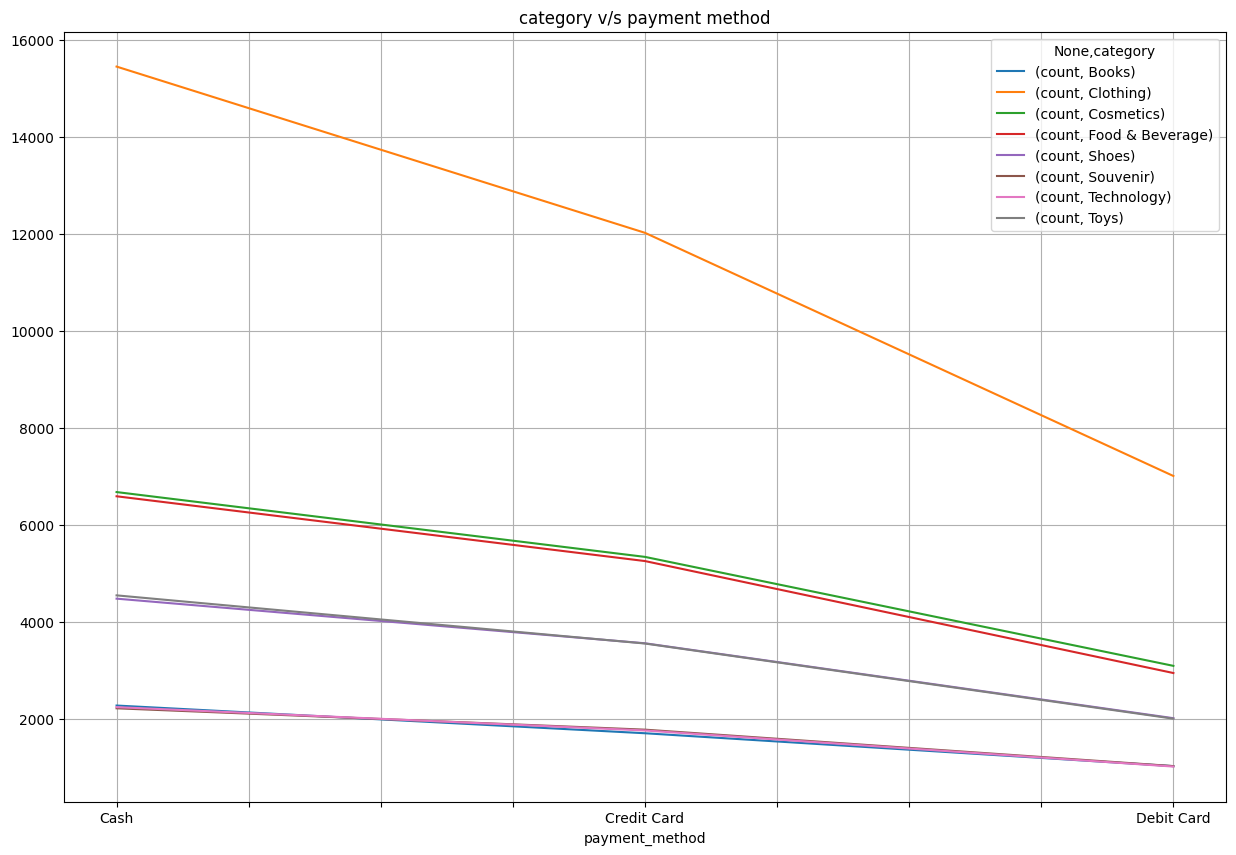

In [45]:
payment_dist.plot(kind='line', figsize=(15,10), title= 'category v/s payment method',grid=True)
plt.show()

Payment method used by different genders

In [46]:
payment_dist1=shopping.pivot_table(index='payment_method',columns='gender',values='Sales', aggfunc=(['count']))
payment_dist1

count       
gender         Female   Male
payment_method              
Cash            26509  17938
Credit Card     21011  13920
Debit Card      11962   8117

# Inferences on Payment Method Exploration

a) Majority of the Payments are done by Cash
b) Least method of payment is Debit Card

# Exploration based on Shopping mall

Popular shopping malls

In [47]:
Group_mall=shopping.groupby("shopping_mall")["shopping_mall"].count().sort_values(ascending=False)
Group_mall

shopping_mall
Mall of Istanbul     19943
Kanyon               19823
Metrocity            15011
Metropol AVM         10161
Istinye Park          9781
Zorlu Center          5075
Cevahir AVM           4991
Forum Istanbul        4947
Viaport Outlet        4914
Emaar Square Mall     4811
Name: shopping_mall, dtype: int64

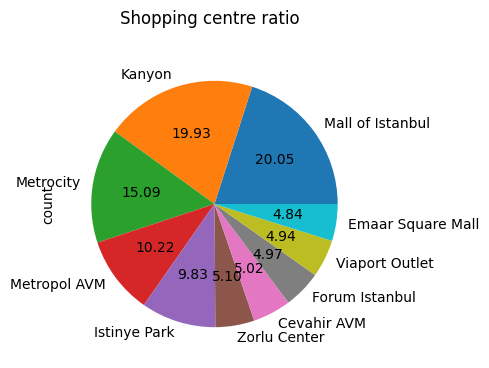

In [48]:
shopping['shopping_mall'].value_counts().plot(kind='pie',autopct='%1.2f', subplots=True, figsize=(4,4), title='Shopping centre ratio')
plt.show()

Revenue generated by different Shopping Malls

In [49]:
revenue1=shopping.groupby("shopping_mall")["Sales"].sum().sort_values(ascending=False)
revenue1

shopping_mall
Mall of Istanbul     50872481.68
Kanyon               50554231.10
Metrocity            37302787.33
Metropol AVM         25379913.19
Istinye Park         24618827.68
Zorlu Center         12901053.82
Cevahir AVM          12645138.20
Viaport Outlet       12521339.72
Emaar Square Mall    12406100.29
Forum Istanbul       12303921.24
Name: Sales, dtype: float64

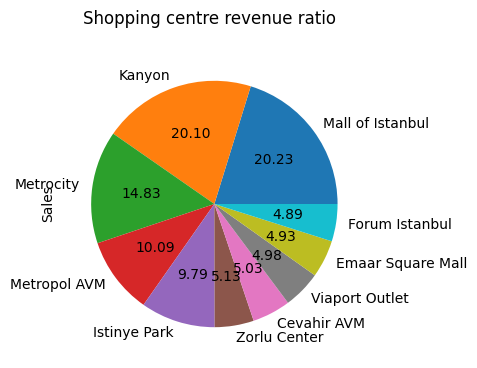

In [50]:
revenue1.plot(kind='pie',autopct='%1.2f', subplots=True, figsize=(4,4), title='Shopping centre revenue ratio')
plt.show()

Revenue generated by different categories in diffrent malls

In [51]:
s5=shopping.pivot_table(index='shopping_mall',columns='category',values='Sales', aggfunc=(['sum']))
s5

sum                                            
category               Books     Clothing   Cosmetics Food & Beverage   
shopping_mall                                                           
Cevahir AVM         44541.00   5706321.28   321214.00        44010.45  \
Emaar Square Mall   41995.80   5590490.40   338941.76        40610.95   
Forum Istanbul      42056.40   5792444.24   353172.76        39162.24   
Istinye Park        76083.30  11253900.24   655357.88        85918.44   
Kanyon             163029.15  22609527.60  1369550.78       166497.05   
Mall of Istanbul   172240.35  22947417.68  1367517.78       171177.90   
Metrocity          125911.65  17226692.56   991860.04       129902.74   
Metropol AVM        83718.90  11568084.00   680770.38        88638.04   
Viaport Outlet      39632.40   5604594.16   347439.70        41662.18   
Zorlu Center        45343.95   5697318.88   367037.82        41955.06   

                                                                  
category                 Shoes   Souvenir  Technology       Toys  
shopping_mall                                                     
Cevahir AVM         3243918.85   29723.82   3051300.0  204108.80  
Emaar Square Mall   3089675.16   30943.74   3094350.0  179092.48  
Forum Istanbul      3327942.65   32879.19   2516850.0  199413.76  
Istinye Park        6641481.22   68925.48   5436900.0  400261.12  
Kanyon             13383190.83  127399.53  11944800.0  790236.16  
Mall of Istanbul   13467814.80  127540.29  11828250.0  790522.88  
Metrocity           9519296.37   94227.09   8608950.0  605946.88  
Metropol AVM        7149825.21   67869.78   5327700.0  413306.88  
Viaport Outlet      3194704.91   27319.17   3066000.0  199987.20  
Zorlu Center        3535601.47   28996.56   2987250.0  197550.08

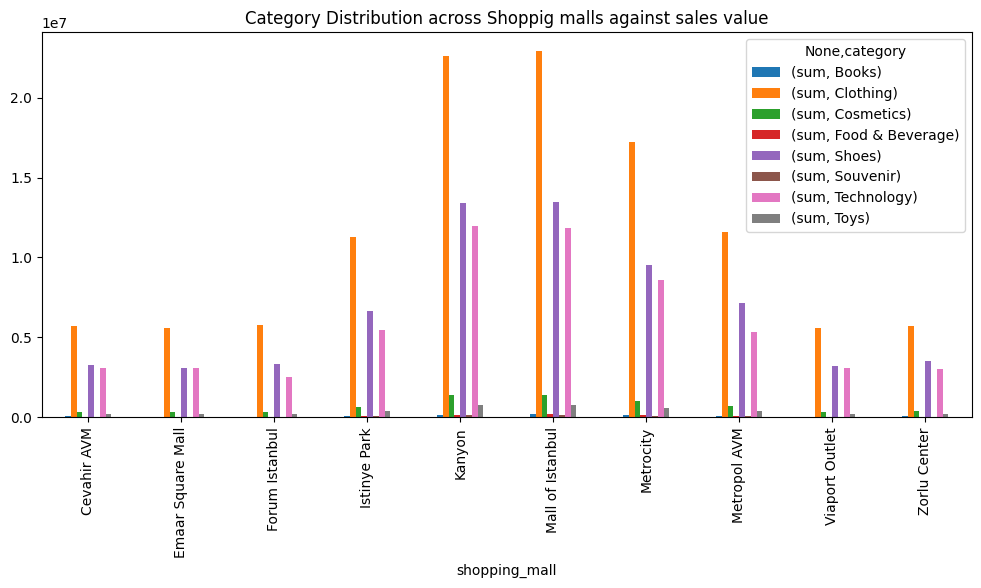

In [52]:
s5.plot(kind='bar', figsize=(12,5), title= 'Category Distribution across Shoppig malls against sales value')
plt.show()

Revenue generated by different malls in diffrent year

In [53]:
s10=shopping.pivot_table(index='year',columns='shopping_mall',values='Sales', aggfunc=(['sum']))
s10

sum                                                 
shopping_mall Cevahir AVM Emaar Square Mall Forum Istanbul Istinye Park   
year                                                                      
2021           5758828.55        5981425.65     5545748.97  11153570.10  \
2022           5831795.35        5423912.51     5800267.22  11469526.74   
2023           1054514.30        1000762.13      957905.05   1995730.84   

                                                                        
shopping_mall       Kanyon Mall of Istanbul    Metrocity Metropol AVM   
year                                                                    
2021           23168216.05      23269156.43  16665693.56  11795485.33  \
2022           22922200.33      23410362.30  17244618.86  11375841.00   
2023            4463814.72       4192962.95   3392474.91   2208586.86   

                                           
shopping_mall Viaport Outlet Zorlu Center  
year                                       
2021              5572378.72   5650067.23  
2022              5920500.33   6037789.44  
2023              1028460.67   1213197.15

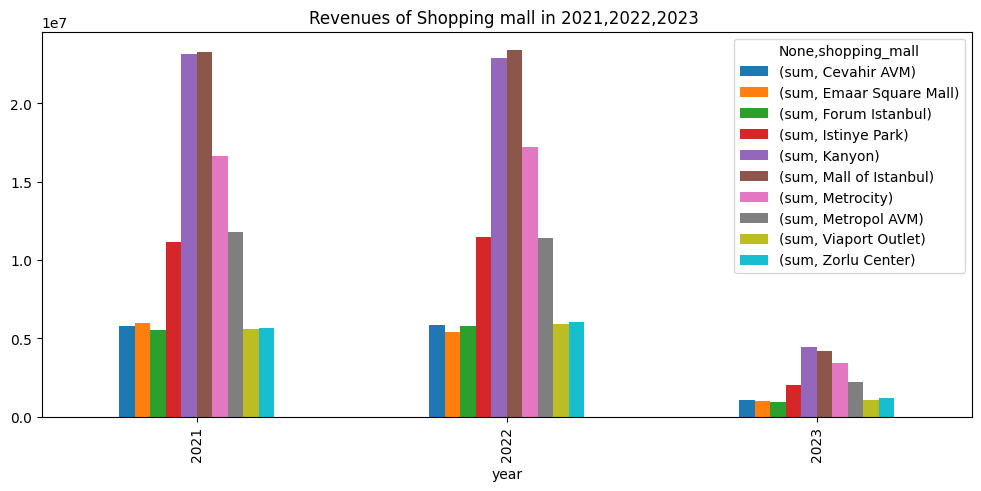

In [54]:
s10.plot(kind='bar', figsize=(12,5), title= 'Revenues of Shopping mall in 2021,2022,2023 ')
plt.show()

# Inferences Made on Shopping Mall Exploration

In [ ]:
a) Mall of Istanbul has the heighest visit and Emar Square has least visit
b) Mall of istanmbull earns heighest revenue and forum istanbull earns less revenue


# Exploration based on Date v/s Sales

Average monthly revenue generated by malls

In [55]:
monthly_sale=shopping.pivot_table(index='month',columns='year',values='Sales', aggfunc=(['mean']))
monthly_sale

mean                          
year          2021         2022         2023
month                                       
1      2514.110722  2538.162501  2416.097766
2      2574.791670  2420.688111  2620.910408
3      2479.769048  2530.196392  2591.903907
4      2521.359168  2478.380133          NaN
5      2539.437882  2584.456776          NaN
6      2454.737338  2540.153752          NaN
7      2588.132450  2586.078333          NaN
8      2586.799812  2467.204905          NaN
9      2503.587362  2608.642218          NaN
10     2620.790363  2672.057009          NaN
11     2439.588017  2374.922884          NaN
12     2469.775872  2598.021974          NaN

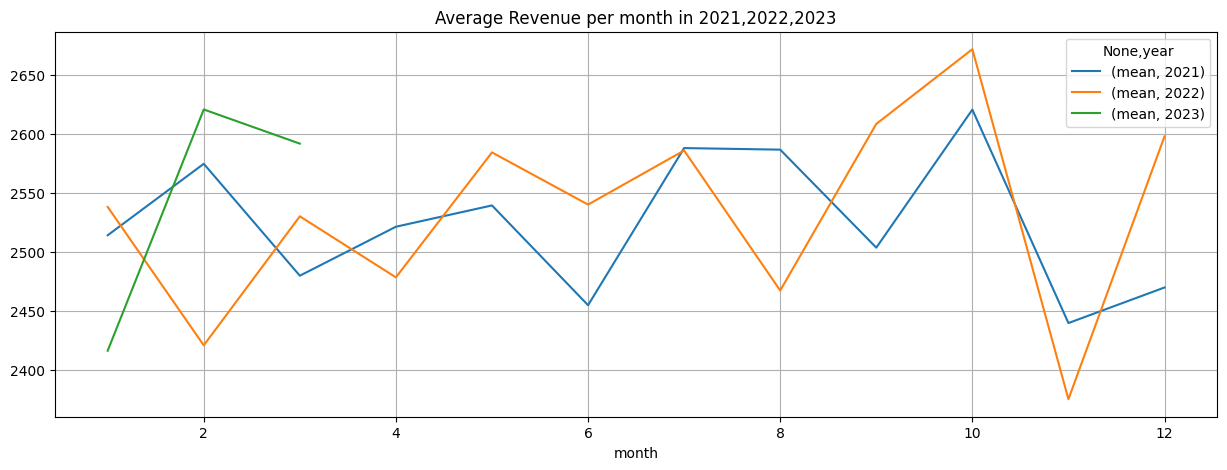

In [56]:
monthly_sale.plot(kind='line',figsize=(15,5),title="Average Revenue per month in 2021,2022,2023", grid=True)
plt.show()

Average revenue genearted by each malls in different year

In [57]:
overall_sale=shopping.pivot_table(index='shopping_mall',columns='year',values='Sales', aggfunc=(['mean']))
overall_sale

mean                          
year                      2021         2022         2023
shopping_mall                                           
Cevahir AVM        2435.022643  2613.982676  2669.656456
Emaar Square Mall  2691.910734  2512.233678  2327.353791
Forum Istanbul     2461.495326  2542.861561  2319.382688
Istinye Park       2524.003191  2536.944645  2373.044994
Kanyon             2589.784937  2504.337412  2589.219675
Mall of Istanbul   2578.014229  2544.051543  2444.876356
Metrocity          2430.818781  2502.847440  2681.798348
Metropol AVM       2520.941511  2466.039670  2541.526881
Viaport Outlet     2437.610989  2666.892041  2520.736936
Zorlu Center       2424.921558  2646.992302  2614.649030

([<matplotlib.axis.XTick at 0x149f78c81c0>,
 [Text(0, 0, 'Cevahir AVM'),
  Text(1, 0, 'Emaar Square Mall'),
  Text(2, 0, 'Forum Istanbul'),
  Text(3, 0, 'Istinye Park'),
  Text(4, 0, 'Kanyon'),
  Text(5, 0, 'Mall of Istanbul'),
  Text(6, 0, 'Metrocity'),
  Text(7, 0, 'Metropol AVM'),
  Text(8, 0, 'Viaport Outlet'),
  Text(9, 0, 'Zorlu Center')])

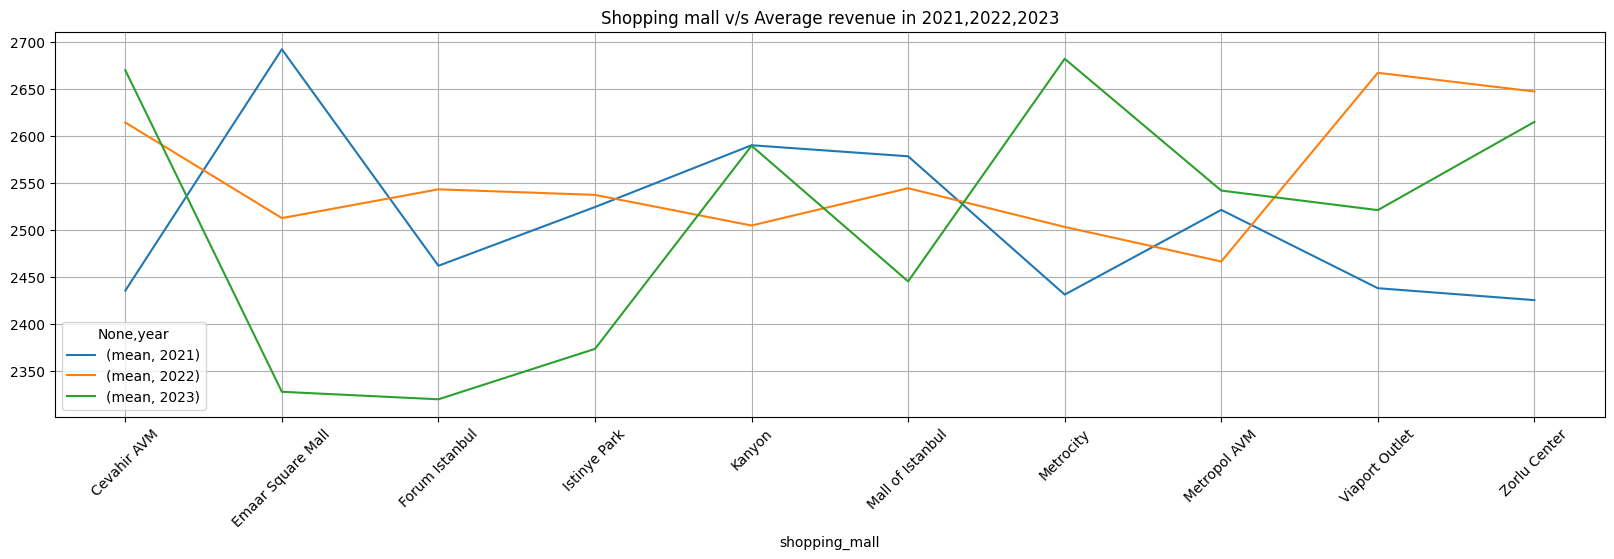

In [58]:
overall_sale.plot(kind='line', figsize=(20, 5), title="Shopping mall v/s Average revenue in 2021,2022,2023", grid=True)
plt.xticks(range(len(s5.index)), s5.index, rotation=45)

# Inferences based on Date Exploration

In [ ]:
a) October Month has the heighst sale and November has the lowest sale 
b) Emar square mall has on an average heighest sale in 2021 and zorlu centre had a average least sale
c) viaport outlet had an average heighest sale in 2022 and metrapol avm had a least average sale
d) Metrocity had an average heighest sal in 2023 and forum istanbull have least

# Report after final analysis

In [ ]:
a) Shopping malls are earning good revenue from clothing and technologie.
b) Shopping malls are earning less revenue from Books and 
c) Female visitors are higher than Males
d) Males contribute in higher revenue than females
e) Age group between 21-30 spend high on Clothings
f) Majority of payments are made by Cash
g) Mall of Istanbull has highest Visitors and Revenue is high
h) Emar Square Mall has least Vistors
i) Forum Istanbull has lowest revenue 
j) October Month has the highest revenue earned in all of the malls